In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/wtitze/3E/main/Medals.xlsx"

medals = pd.read_excel(url)
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [ ]:
###  eliminazione delle ultime due colonne

medals = medals.drop(columns= ["Total", "Rank by Total"])
medals

,Rank,Team/NOC,Gold,Silver,Bronze
0,1,United States of America,39,41,33
1,2,People's Republic of China,38,32,18
2,3,Japan,27,14,17
3,4,Great Britain,22,21,22
4,5,ROC,20,28,23
...,...,...,...,...,...
88,86,Ghana,0,0,1
89,86,Grenada,0,0,1
90,86,Kuwait,0,0,1
91,86,Republic of Moldova,0,0,1


In [ ]:
medals = medals.drop(columns= ["Rank"])
medals

,Team/NOC,Gold,Silver,Bronze
0,United States of America,39,41,33
1,People's Republic of China,38,32,18
2,Japan,27,14,17
3,Great Britain,22,21,22
4,ROC,20,28,23
...,...,...,...,...
88,Ghana,0,0,1
89,Grenada,0,0,1
90,Kuwait,0,0,1
91,Republic of Moldova,0,0,1


In [ ]:
medals.rename(columns={"Team/NOC" : "Team"}, inplace = True)
medals

,Rank,Team,Gold,Silver,Bronze,Total,Rank by Total,Percentuale
0,1,United States of America,39,41,33,113,1,10.46
1,2,People's Republic of China,38,32,18,88,2,8.15
2,3,Japan,27,14,17,58,5,5.37
3,4,Great Britain,22,21,22,65,4,6.02
4,5,ROC,20,28,23,71,3,6.57
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,0.09
89,86,Grenada,0,0,1,1,77,0.09
90,86,Kuwait,0,0,1,1,77,0.09
91,86,Republic of Moldova,0,0,1,1,77,0.09


In [ ]:
#  visualizzare il numero di medaglie d’oro vinte dall’Italia

medals[medals["Team"] == "Italy"]["Gold"]

9    10
Name: Gold, dtype: int64

In [ ]:
#visualizzare il numero di medaglie d’oro delle nazioni che cominciano con la lettera F

medals[medals["Team"].str.startswith("F")][["Team", "Gold"]]

,Gold,Team
7,10,France
59,1,Fiji
84,0,Finland


<BarContainer object of 3 artists>

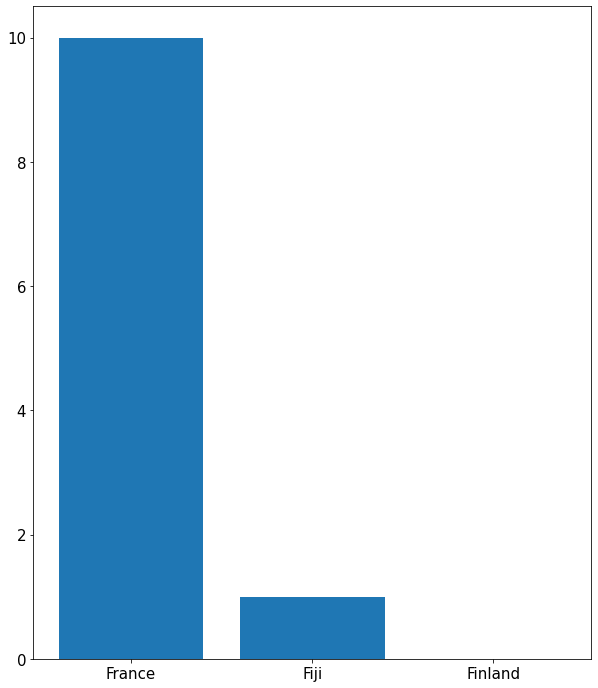

In [ ]:
import matplotlib.pyplot as plt

# visualizzare il grafico delle medaglie d'oro vinte dalle nazioni che iniziano con la lettera F

x = list(medals[medals["Team"].str.startswith("F")]["Team"])
y = list(medals[medals["Team"].str.startswith("F")]["Gold"])

fig = plt.figure(figsize=(10,12))
ax = plt.axes()
plt.rcParams.update({'font.size': 30})
ax.bar(x,y)


In [ ]:
#  aggiungere una colonna contenente il numero totale di medaglie di ogni nazione. Chiamare la colonna “Total”

medals["Total"] = medals["Gold"] + medals["Silver"] + medals["Bronze"]
medals

,Team,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


In [ ]:
# visualizzare la nazione che ha vinto più medaglie (in totale)

medals[medals["Total"] == medals["Total"].max()]["Team"]

0    United States of America
Name: Team, dtype: object

In [ ]:
# visualizzare il numero totale di medaglie vinte complessivamente da tutte le nazioni

medals["Total"].sum()

1080

In [ ]:
# aggiungere una colonna contenente la percentuale di medaglie vinte da ogni nazione. Chiamare la colonna “Percentuale”
numMedal = medals["Bronze"] + medals["Silver"] + medals["Gold"]
medals["Percentuale"] = round((100 * numMedal) / medals["Total"].sum(),2)   ### SI USA round() per vedere uno specifico numero di numeri dopo la virgola
medals

,Rank,Team,Gold,Silver,Bronze,Total,Rank by Total,Percentuale
0,1,United States of America,39,41,33,113,1,10.46
1,2,People's Republic of China,38,32,18,88,2,8.15
2,3,Japan,27,14,17,58,5,5.37
3,4,Great Britain,22,21,22,65,4,6.02
4,5,ROC,20,28,23,71,3,6.57
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,0.09
89,86,Grenada,0,0,1,1,77,0.09
90,86,Kuwait,0,0,1,1,77,0.09
91,86,Republic of Moldova,0,0,1,1,77,0.09


In [ ]:
teams = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Teams.xlsx')
teams

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


In [ ]:
# visualizzare il numero di squadre per ogni sesso

teams[teams['Event'] == 'Men'][['Discipline']].count()

Discipline    120
dtype: int64

In [ ]:
teams[teams['Event'] == 'Women'][['Discipline']].count()

Discipline    114
dtype: int64

In [ ]:
# visualizzare il numero di discipline a cui ha partecipato ogni nazione. Ordinare in ordine decrescente a partire dalla nazione che ha presentato più squadre. Contare insieme squadre maschili e femminili

teams.groupby('Name')['Discipline'].count().sort_values(ascending = False)

Name
Japan                           45
United States                   43
Italy                           34
Germany                         32
France                          32
                                ..
Liechtenstein                    1
Liliana/Elsa                     1
Lucena/Dalhausser                1
Ludwig/Kozuch                    1
ACHANTA Kamal / BATRA Manika     1
Name: Discipline, Length: 146, dtype: int64

In [ ]:
# visualizzare il numero di nazioni che hanno partecipato alle varie discipline. Ordinare in ordine decrescente in base alla disciplina che ha avuto più squadre partecipanti

teams.groupby("Discipline")["Name"].count().sort_values(ascending = False)

Discipline
Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Table Tennis            48
Beach Volleyball        48
Artistic Swimming       32
Football                28
Rugby Sevens            24
Artistic Gymnastics     24
Hockey                  24
Handball                24
Volleyball              24
Basketball              24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: Name, dtype: int64

In [ ]:
# visualizzare il nome della nazione che ha portato più squadre

df1 = teams.groupby("Name").count()
max = df1["Discipline"].max()
df1.loc[df1["Discipline"] == max] ["Discipline"]

Name
Japan    45
Name: Discipline, dtype: int64

In [ ]:
# eliminare la colonna “Event”

teams = teams.drop(columns = ["Event"])
teams

,Name,Discipline,NOC
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America


In [ ]:
# rinominare la colonna NOC in “Name”

teams.rename(columns={"NOC" : "Name"}, inplace = True)
teams

,Country,Discipline,Name
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America


In [ ]:
teams.rename(columns={"NOC" : "Name"}, inplace = True)
teams

,Country,Discipline,Name
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America
